In [91]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [92]:
df_raw = pd.read_csv('Data\export.csv')

In [93]:
df = df_raw.copy()

In [94]:
df.head(2)

,Patient ID,Marital status at diagnosis,Age recode with <1 year olds,Sex,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Primary Site - labeled,Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Histologic Type ICD-O-3,Median household income inflation adj to 2021,Grade Clinical (2018+),SEER cause-specific death classification,SEER other cause of death classification,Survival months,Survival months flag
0,693,Divorced,65-69 years,Male,Non-Hispanic White,"C34.1-Upper lobe, lung",T3,N1,M0,3A,8140,"$75,000+",2,Alive or dead of other cause,Alive or dead due to cancer,0035,Complete dates are available and there are more than 0 days of survival
1,1434,Single (never married),65-69 years,Female,Non-Hispanic White,"C34.1-Upper lobe, lung",T2a,N0,M0,1B,8140,"$75,000+",3,Alive or dead of other cause,Alive or dead due to cancer,0001,Complete dates are available and there are more than 0 days of survival


In [95]:
df.shape

(143573, 17)

In [96]:
# drop SEER cause-specific death classification, SEER other cause of death classification, Survival months flag
df.drop(['SEER cause-specific death classification', 'SEER other cause of death classification', 'Survival months flag'], axis=1, inplace=True)

In [97]:
# drop Unknown in Survival months
df = df[df['Survival months'] != 'Unknown']

In [98]:
df['Survival months num'] = df['Survival months'].astype(int)

# drop Survival months
df.drop(['Survival months'], axis=1, inplace=True)

# for only CSCLC

In [99]:
df_1 = df.copy()

In [100]:
# only keep Histologic Type ICD-O-3 == 8045
df_1 = df_1[df_1['Histologic Type ICD-O-3'] == 8045]

display(df_1.head(2), df_1.shape)

,Patient ID,Marital status at diagnosis,Age recode with <1 year olds,Sex,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Primary Site - labeled,Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Histologic Type ICD-O-3,Median household income inflation adj to 2021,Grade Clinical (2018+),Survival months num
215,673920,Widowed,80-84 years,Female,Non-Hispanic White,"C34.9-Lung, NOS",TX,N2,M1a,4A,8045,"$75,000+",9,2
641,1081533,Single (never married),70-74 years,Female,Non-Hispanic White,"C34.3-Lower lobe, lung",T1a,N0,M0,1A1,8045,"$75,000+",9,11


(330, 14)

In [101]:
df_1['Survival months num'].describe()

count    330.000000
mean       9.809091
std        9.429465
min        0.000000
25%        2.000000
50%        7.000000
75%       15.000000
max       35.000000
Name: Survival months num, dtype: float64

<Axes: >

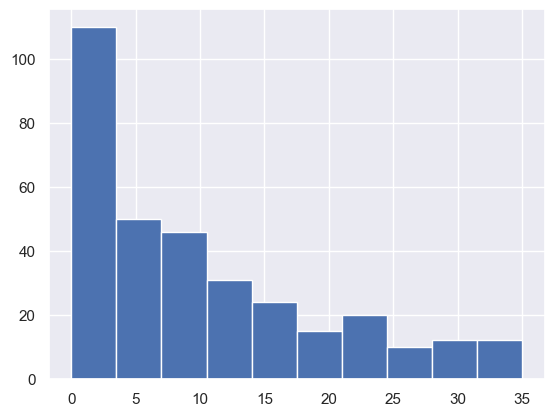

In [102]:
df_1['Survival months num'].hist()

In [103]:
df_1['Derived EOD 2018 T (2018+)'].value_counts(dropna=False).sort_index()

Derived EOD 2018 T (2018+)
T0       4
T1a     11
T1b     35
T1c     27
T1mi     9
T2a     64
T2b     22
T3      39
T4      93
TX      26
Name: count, dtype: int64

In [104]:
df_1['Derived EOD 2018 N (2018+)'].value_counts(dropna=False).sort_index()

Derived EOD 2018 N (2018+)
N0    123
N1     29
N2    106
N3     60
NX     12
Name: count, dtype: int64

In [105]:
df_1['Derived EOD 2018 M (2018+)'].value_counts(dropna=False).sort_index()

Derived EOD 2018 M (2018+)
M0     173
M1      11
M1a     26
M1b     33
M1c     87
Name: count, dtype: int64

In [106]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
def check_stats(df):
    stats = pd.DataFrame(columns=df.columns, index=["counts", "unique counts", "unique values or range"])

    # Counts
    stats.loc["counts"] = df.count()

    # Unique Counts
    stats.loc["unique counts"] = df.nunique()

    # Unique Values or Range
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # For object or category data
            unique_vals = df[col].unique()
            stats.at["unique values or range", col] = str(list(unique_vals))
        else:
            # For numeric data
            min_val = df[col].min()
            max_val = df[col].max()
            stats.at["unique values or range", col] = f"[{min_val}, {max_val}]"

    return stats


In [107]:
check_stats(df_1)

,Patient ID,Marital status at diagnosis,Age recode with <1 year olds,Sex,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Primary Site - labeled,Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Histologic Type ICD-O-3,Median household income inflation adj to 2021,Grade Clinical (2018+),Survival months num
counts,330,330,330,330,330,330,330,330,330,330,330,330,330,330
unique counts,328,7,10,2,5,6,10,5,5,14,1,10,8,36
unique values or range,"[673920, 63246975]","['Widowed', 'Single (never married)', 'Married (including common law)', 'Divorced', 'Unknown', 'Unmarried or Domestic Partner', 'Separated']","['80-84 years', '70-74 years', '75-79 years', '85+ years', '60-64 years', '55-59 years', '65-69 years', '45-49 years', '50-54 years', '35-39 years']","['Female', 'Male']","['Non-Hispanic White', 'Hispanic (All Races)', 'Non-Hispanic Asian or Pacific Islander', 'Non-Hispanic Black', 'Non-Hispanic American Indian/Alaska Native']","['C34.9-Lung, NOS', 'C34.3-Lower lobe, lung', 'C34.1-Upper lobe, lung', 'C34.8-Overlapping lesion of lung', 'C34.0-Main bronchus', 'C34.2-Middle lobe, lung']","['TX', 'T1a', 'T2a', 'T2b', 'T4', 'T1b', 'T1mi', 'T1c', 'T0', 'T3']","['N2', 'N0', 'N3', 'NX', 'N1']","['M1a', 'M0', 'M1c', 'M1b', 'M1']","['4A', '1A1', '3A', '4B', '1A2', '99', '1B', '3', '3B', '4', '2B', '3C', '1A3', '2A']","[8045, 8045]","['$75,000+', '$70,000 - $74,999', '$55,000 - $59,999', '$60,000 - $64,999', '$50,000 - $54,999', '$65,000 - $69,999', '$45,000 - $49,999', '$35,000 - $39,999', '$40,000 - $44,999', '< $35,000']","['9', '3', '2', '4', '1', 9, 3, 1]","[0, 35]"


In [108]:
# drop duplicate rows
df_1.drop_duplicates(inplace=True)

# drop missing values
df_1.dropna(inplace=True)

In [109]:
df_1.shape

(329, 14)

In [110]:
# drop patient id
df_1.drop(['Patient ID','Histologic Type ICD-O-3'], axis=1, inplace=True)

In [111]:
# write a loop to convert object to category
for col in df_1.columns:
    if df_1[col].dtype == 'object':
        df_1[col] = df_1[col].astype('category')

In [112]:
from math import ceil
# draw multiple plots
def transform_exploration(dataframe, x_vars):
    # Determine the size of the grid
    num_plots = len(x_vars)
    num_columns = 2  # We'll use 2 columns for the plots
    num_rows = ceil(num_plots / num_columns)  # Calculate the required number of rows

    # Create the subplots
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows), squeeze=False)
    axs = axs.flatten()  # Flatten the array for easy iteration

    # Plot each transformation
    for i, var in enumerate(x_vars):
        sns.histplot(data=dataframe, x=var, bins=100, multiple="dodge", ax=axs[i])

    # Hide any unused subplots
    for ax in axs[i+1:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

In [113]:
df1=df_1[['Survival months num']].copy()

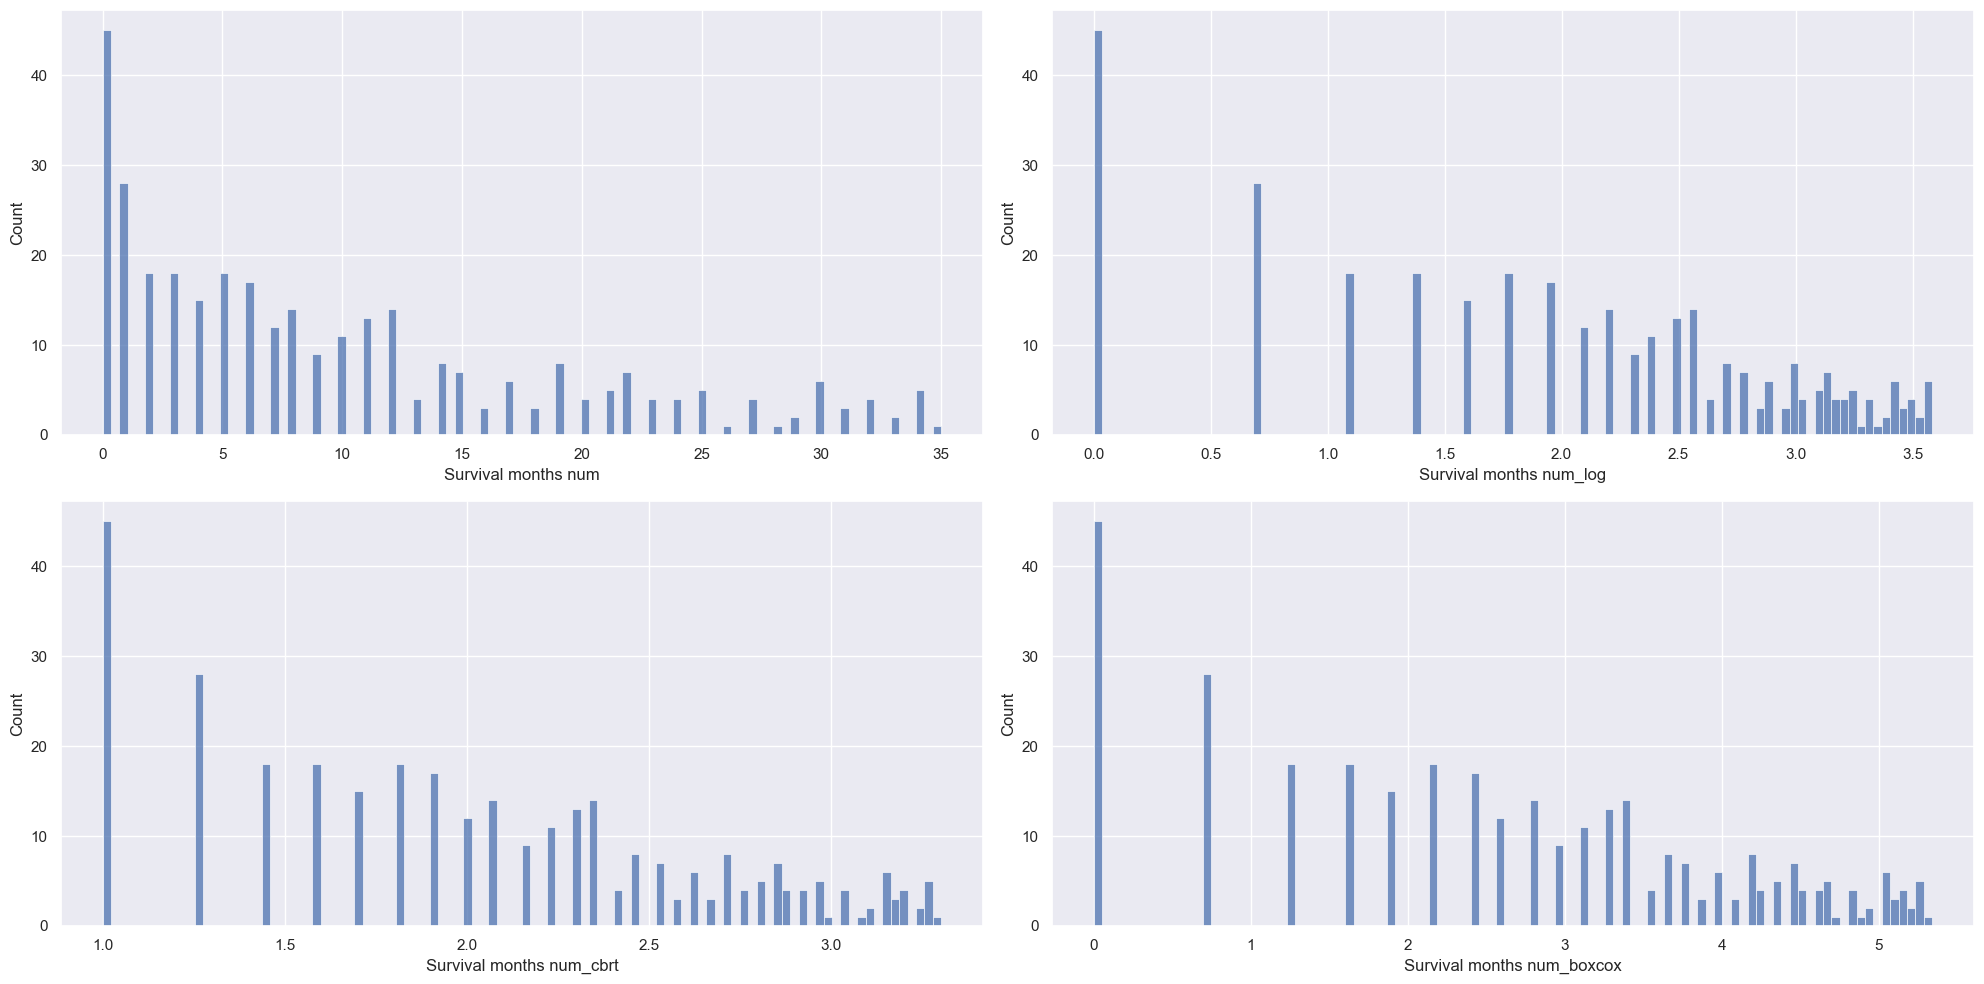

In [114]:
from scipy.stats import boxcox

df1['Survival months num_log'] = np.log(df1['Survival months num']+1)
df1['Survival months num_cbrt'] = np.cbrt(df1['Survival months num']+1)
df1['Survival months num_boxcox'], lam = boxcox(df1['Survival months num']+1)

# test the normality of the data
transform_exploration(df1,['Survival months num','Survival months num_log',
                           'Survival months num_cbrt','Survival months num_boxcox'])

In [115]:
df_1.columns = df_1.columns.str.replace('[\[\]\{\},]', '', regex=True)

In [117]:
# split data into train and test
from sklearn.model_selection import train_test_split
X=df_1.drop(['Survival months num'], axis=1)
y=df_1['Survival months num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((230, 11), (99, 11), (230,), (99,))

In [118]:
# define the categorical features
categorical_features = df_1.select_dtypes(include=['category']).columns.tolist()

In [119]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score

import optuna
from optuna.integration.lightgbm import LightGBMTunerCV as lgbtcv
from lightgbm import early_stopping
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [120]:
# Define parameters for LightGBM
params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

# Create LightGBM dataset
dtrain_trans = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)

study_auto_lgbr_trans = optuna.create_study(direction='minimize', study_name='LightGBM Tuner CV Regression')
# Perform cross-validation
auto_lgbr_tuner_trans = lgbtcv(
    params=params,  # Parameters for task
    train_set=dtrain_trans,  # Data to be trained on
    num_boost_round=100,  # Number of boosting iterations
    nfold=5,  # Number of folds in CV
    stratified=False,  # Not using stratified sampling for regression
    seed=66,  # Fix random seed for reproducibility of cv
    optuna_seed=66,  # Fix random seed for reproducibility of optuna trials
    shuffle=True,  # Shuffle data before creating folds
    callbacks=[early_stopping(10)],  # Early stopping rounds
    study=study_auto_lgbr_trans
)


auto_lgbr_tuner_trans.run()

feature_fraction, val_score: 8.911279: 100%|##########| 7/7 [00:00<00:00, 38.40it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[9]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[9]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	cv_agg's valid rmse: 8.91128 + 0.56243


Training until validation scores don't improve for 10 rounds


Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243


Training until validation scores don't improve for 10 rounds


Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243


num_leaves, val_score: 8.911279:  45%|####5     | 9/20 [00:00<00:00, 23.68it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243


num_leaves, val_score: 8.911279:  50%|#####     | 10/20 [00:00<00:00, 23.68it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243


num_leaves, val_score: 8.911279: 100%|##########| 20/20 [00:00<00:00, 23.33it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	cv_agg's valid rmse: 8.91717 + 0.560027


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[34]	cv_agg's valid rmse: 8.91128 + 0.56243
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90351 + 0.585109


bagging, val_score: 8.901078:  30%|###       | 3/10 [00:00<00:00, 18.91it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90301 + 0.583514


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90281 + 0.583992
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90301 + 0.583514
Training until validation scores don't improve for 10 rounds


Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90281 + 0.583992
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	cv_agg's valid rmse: 8.9167 + 0.559663


bagging, val_score: 8.901078: 100%|##########| 10/10 [00:00<00:00, 18.88it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	cv_agg's valid rmse: 8.91687 + 0.560293


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	cv_agg's valid rmse: 8.91266 + 0.566577
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	cv_agg's valid rmse: 8.91266 + 0.566577


feature_fraction_stage2, val_score: 8.901078: 100%|##########| 3/3 [00:00<00:00, 23.81it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	cv_agg's valid rmse: 8.91266 + 0.566577


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.9011 + 0.582615


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90111 + 0.582576
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90117 + 0.582395


regularization_factors, val_score: 8.901078:  10%|#         | 2/20 [00:00<00:00, 18.56it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90117 + 0.5824


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90116 + 0.582441


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90112 + 0.582564


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90111 + 0.58257


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90109 + 0.582651


regularization_factors, val_score: 8.901078:  35%|###5      | 7/20 [00:00<00:00, 16.70it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582678
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


regularization_factors, val_score: 8.901078:  45%|####5     | 9/20 [00:00<00:00, 16.40it/s]

Training until validation scores don't improve for 10 rounds


Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


regularization_factors, val_score: 8.901078:  55%|#####5    | 11/20 [00:00<00:00, 17.23it/s]


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


regularization_factors, val_score: 8.901078:  65%|######5   | 13/20 [00:00<00:00, 17.59it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds


Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


regularization_factors, val_score: 8.901078: 100%|##########| 20/20 [00:01<00:00, 17.17it/s]



Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


min_child_samples, val_score: 8.901078:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	cv_agg's valid rmse: 8.91775 + 0.559802
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


min_child_samples, val_score: 8.901078: 100%|##########| 5/5 [00:00<00:00, 20.32it/s]

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	cv_agg's valid rmse: 8.90108 + 0.582679


In [121]:
auto_params_trans = auto_lgbr_tuner_trans.best_params
auto_lgbr_best_model_trans = lgb.LGBMRegressor(**auto_params_trans, random_state=66)
auto_lgbr_best_model_trans.fit(X_train, y_train, categorical_feature=categorical_features)
print('Best Params:', auto_params_trans)

Best Params: {'objective': 'regression', 'metric': 'rmse', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 31, 'feature_fraction': 0.4, 'bagging_fraction': 0.7051063765092334, 'bagging_freq': 2, 'min_child_samples': 20}


In [122]:
from sklearn.metrics import mean_squared_error
# Make predictions and evaluate
y_pred_lgbr_trans = auto_lgbr_best_model_trans.predict(X_test)
rmse_lgbr_trans = mean_squared_error(y_test, y_pred_lgbr_trans, squared=False)
r2_testing_lgbr_trans = auto_lgbr_best_model_trans.score(X_test, y_test)
r2_training_lgbr_trans = auto_lgbr_best_model_trans.score(X_train, y_train)
# Adjusted R2 Calculation
def adjusted_r2(r_square, n, p):
    return 1 - (1 - r_square) * (n - 1) / (n - p - 1)
adjusted_r2_training_lgbr_trans = adjusted_r2(r2_training_lgbr_trans, X_train.shape[0], X_train.shape[1])
adjusted_r2_testing_lgbr_trans = adjusted_r2(r2_testing_lgbr_trans, X_train.shape[0], X_train.shape[1])

print('Root Mean Squared Error:', rmse_lgbr_trans)
print('R2 Training:', r2_training_lgbr_trans)
print('R2 Testing:', r2_testing_lgbr_trans)
print('Adjusted R2 Training:', adjusted_r2_training_lgbr_trans)
print('Adjusted R2 Testing:', adjusted_r2_testing_lgbr_trans)

Root Mean Squared Error: 10.427672559151912
R2 Training: 0.005124281359833782
R2 Testing: -0.0038137957001200817
Adjusted R2 Training: -0.04507586958072496
Adjusted R2 Testing: -0.05446495052902511
